In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from numba import jit

@jit
def mandelbrot(x,y,threshold):
    c = complex(x,y)
    z = complex(0,0)
    
    for i in range(threshold):
        z = z**2 + c
        if abs(z) > 4:
            return i%24
        
    return (threshold - 1)%24

In [25]:
def thresh_animate(i):
    #animation of the threshold increasing each frame - increases the accuracy
    #of the mandelbrot plot
    axes.clear()
    axes.axes.xaxis.set_visible(False)
    axes.axes.yaxis.set_visible(False)
    
    X = np.empty((len(real_axis),len(imag_axis)))
    threshold = round(1.15**(i + 1))
    
    for i in range(len(real_axis)):
        for j in range(len(imag_axis)):
            X[i,j] = mandelbrot(real_axis[i],imag_axis[j],threshold)
            
    img = axes.imshow(X.T, interpolation="bicubic", cmap='magma')
    return [img]

In [8]:
def zoom_animate(i):
    zoom_factor = 1.25**(-i)
    x_start_zoom, y_start_zoom = zoom_factor*x_start+x_center, zoom_factor*y_start+y_center
    width_zoom, height_zoom = zoom_factor*width, zoom_factor*height
    
    real_zoom = np.linspace(x_start_zoom, x_start_zoom+width_zoom, density)
    imag_zoom = np.linspace(y_start_zoom, y_start_zoom+height_zoom, density)
    
    axes.clear()
    axes.axes.xaxis.set_visible(False)
    axes.axes.yaxis.set_visible(False)

    X_zoom = np.empty((len(real_zoom),len(imag_zoom)))
    
    for i in range(len(real_zoom)):
        for j in range(len(imag_zoom)):
            X_zoom[i,j] = mandelbrot(real_zoom[i],imag_zoom[j],500)
            
    img = axes.imshow(X_zoom.T, cmap='hsv')
    return [img]

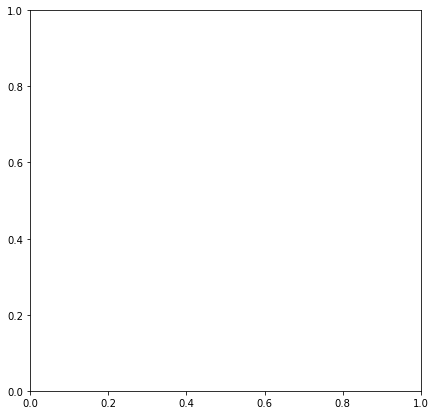

In [26]:
#x_center, y_center = -0.812223315621338, -0.185453926110785
x_center, y_center = -0.811123315621338, -0.186633926110785
x_start, y_start = -1.75,-1.5
width, height = 3.,3.
density = 1000

real_axis = np.linspace(x_start, x_start+width, density)
imag_axis = np.linspace(y_start, y_start+height, density)

fig = plt.figure(figsize=(7,7))
axes = plt.axes()

In [31]:
thresh_anim = animation.FuncAnimation(fig, thresh_animate, frames=22, interval=120, blit=True)
thresh_anim.save('mandelbrot_threshold.gif', writer='pillow')

In [32]:
my_anim = animation.FuncAnimation(fig, zoom_animate, frames=100, interval=100, blit=True)
my_anim.save('mandelbrot_zoom.gif',writer='pillow')

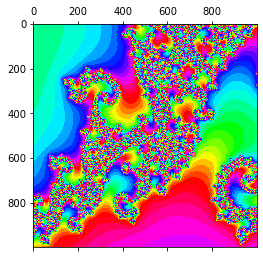

In [37]:
# ------------------------------------------------------#
#          FOR TESTING OUT MANDELBROT ZOOM INS          #
# ------------------------------------------------------#

x0, y0 = -0.811123315621338, -0.186633926110785

zoom = 1.25**(-80)
x_i, y_i = zoom*x_start+x0, zoom*y_start+y0
windowL = zoom*width

real_test = np.linspace(x_i, x_i+windowL, density)
imag_test = np.linspace(y_i, y_i+windowL, density)

test_fig = np.empty((len(real_test), len(imag_test)))

for i in range(len(real_test)):
    for j in range(len(imag_test)):
        test_fig[i,j]=mandelbrot(real_test[i],imag_test[j],500)
        
plt.matshow(test_fig,cmap='hsv')

In [10]:
@jit
def julia_quadratic(z):
    c = complex(-0.7,-0.3)
    
    for i in range(500):
        if abs(z) > 2.0:
            break
        else:
            z = z**2 + c
    return i

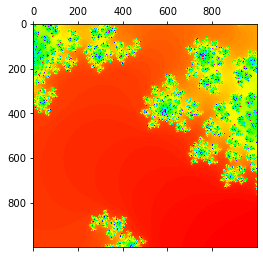

In [11]:
# ------------------------------------------------------#
#         FOR TESTING OUT JULIA ZOOM INS                #
# ------------------------------------------------------#

juliaX_center, juliaY_center = -0.3895429, 0.0
juliaX, juliaY = juliaX_center-width/2., juliaY_center-width/2.

juliaZoom = 1.25**(-55)
juliaX_zoom, juliaY_zoom = juliaZoom*juliaX+juliaX_center, juliaZoom*juliaY+juliaY_center
juliaWidth_zoom = juliaZoom*width

julia_real = np.linspace(juliaX_zoom, juliaX_zoom+juliaWidth_zoom, density)
julia_imag = np.linspace(juliaY_zoom, juliaY_zoom+juliaWidth_zoom, density)

julia_test = np.empty((len(julia_real), len(julia_imag)))

for i in range(len(julia_real)):
    for j in range(len(julia_imag)):
        julia_test[i,j]=julia_quadratic(complex(julia_real[i],julia_imag[j]))
        
plt.matshow(julia_test,cmap='hsv')

In [30]:
def julia_zoom_animate(i):
    juliaZoom = 1.25**(-i)
    juliaX_zoom, juliaY_zoom = juliaZoom*juliaX+juliaX_center, juliaZoom*juliaY+juliaY_center
    juliaWidth_zoom = juliaZoom*width

    julia_real = np.linspace(juliaX_zoom, juliaX_zoom+juliaWidth_zoom, density)
    julia_imag = np.linspace(juliaY_zoom, juliaY_zoom+juliaWidth_zoom, density)
    
    axes.clear()
    axes.axes.xaxis.set_visible(False)
    axes.axes.yaxis.set_visible(False)
    
    julia_mat = np.empty((len(julia_real), len(julia_imag)))

    for i in range(len(julia_real)):
        for j in range(len(julia_imag)):
            julia_mat[i,j]=julia_quadratic(complex(julia_real[i],julia_imag[j]))
    
    img = axes.imshow(julia_mat.T, cmap='hsv')
    return [img]

In [33]:
julia_anim = animation.FuncAnimation(fig, julia_zoom_animate, frames=55, interval=100, blit=True)
julia_anim.save('julia_zoom.gif',writer='pillow')